In [1]:
!pip install shapely

Living Room: Inside, Overlap percentage: 100.00%
Bedroom: Outside, Overlap percentage: 0.00%
Balcony: Outside, Overlap percentage: 0.00%


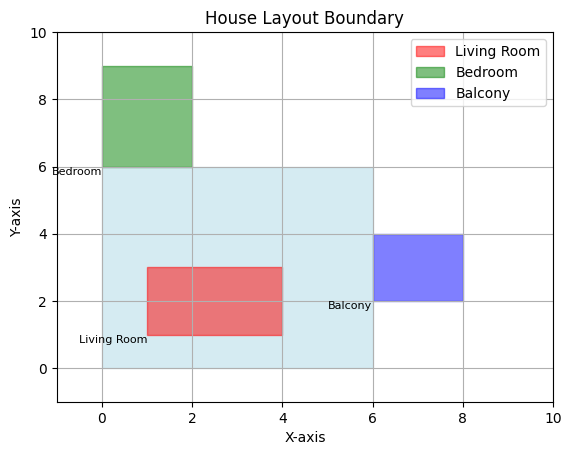

In [16]:
# Plotting
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon as MatplotlibPolygon

def is_rectangle_inside_polygon(rectangle, polygon):
    for point in rectangle['coordinates']:
        if not polygon.contains(Point(point)):
            return False
    return True

def calculate_overlap_percentage(rectangle, polygon):
    rectangle_polygon = Polygon(rectangle['coordinates'])
    intersection_area = rectangle_polygon.intersection(polygon).area
    rectangle_area = rectangle_polygon.area

    if rectangle_area == 0:
        return 0  

    overlap_percentage = (intersection_area / rectangle_area) * 100
    return overlap_percentage

def plot_polygon(ax, polygon, color='lightblue'):
    poly_patch = MatplotlibPolygon(polygon.exterior.coords, alpha=0.5, color=color)
    ax.add_patch(poly_patch)

def plot_rectangle(ax, rectangle, color='orange'):
    rect_patch = MatplotlibPolygon(rectangle['coordinates'], alpha=0.5, color=color, label=rectangle['name'])
    ax.add_patch(rect_patch)
    ax.text(rectangle['coordinates'][0][0], rectangle['coordinates'][0][1], rectangle['name'],
            fontsize=8, ha='right', va='top')

def calculate_axis_limits(boundary_polygon):
    return -1, 10, -1, 10  

def plot_boundary_and_rectangles(boundary_polygon_coordinates, rectangles):
    
    boundary_polygon = Polygon(boundary_polygon_coordinates)

    fig, ax = plt.subplots()

    plot_polygon(ax, boundary_polygon)

    colors = ['red', 'green', 'blue', 'purple']  # Define colors for each rectangle

    for i, rectangle in enumerate(rectangles):
        plot_rectangle(ax, rectangle, color=colors[i])
        is_inside = is_rectangle_inside_polygon(rectangle, boundary_polygon)
        inside_label = 'Inside' if is_inside else 'Outside'
        overlap_percentage = calculate_overlap_percentage(rectangle, boundary_polygon)
        print(f"{rectangle['name']}: {inside_label}, Overlap percentage: {overlap_percentage:.2f}%")

    min_x, max_x, min_y, max_y = calculate_axis_limits(boundary_polygon)
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(min_y, max_y)

    ax.legend()
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('House Layout Boundary')
    plt.grid(True)
    plt.show()

# Sample input
boundary_polygon_coordinates = [(0, 0), (0, 6), (6, 6), (6, 0)]
rectangles = [
    {'name': 'Living Room', 'coordinates': [(1, 1), (1, 3), (4, 3), (4, 1)]},  # Inside the boundary
    {'name': 'Bedroom', 'coordinates': [(0, 6), (0, 9), (2, 9), (2, 6)]},
    {'name': 'Balcony', 'coordinates': [(6, 2), (6, 4), (8, 4), (8, 2)]}  # Outside the boundary
]

# Call the plotting function
plot_boundary_and_rectangles(boundary_polygon_coordinates, rectangles)


Living Room: Inside, Overlap percentage: 100.00%
Bedroom: Outside, Overlap percentage: 0.00%
Balcony: Outside, Overlap percentage: 0.00%


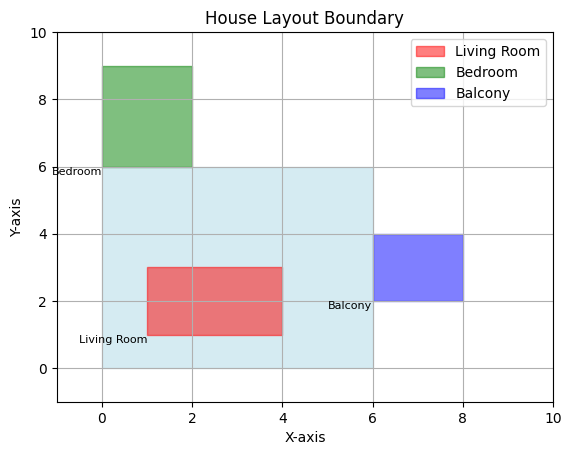

In [17]:
# This is the function used to plot existing polygons and rectangles
plot_boundary_and_rectangles(boundary_polygon_coordinates, rectangles)

[{'name': 'Living Room', 'coordinates': [(1, 1), (1, 3), (4, 3), (4, 1)]}, {'name': 'Bedroom', 'coordinates': [(2.0, 3.0), (2.0, 6.0), (4.0, 6.0), (4.0, 3.0)]}, {'name': 'Balcony', 'coordinates': [(3.0, 2.0), (3.0, 4.0), (5.0, 4.0), (5.0, 2.0)]}]
Living Room: Inside, Overlap percentage: 100.00%
Bedroom: Outside, Overlap percentage: 100.00%
Balcony: Inside, Overlap percentage: 100.00%


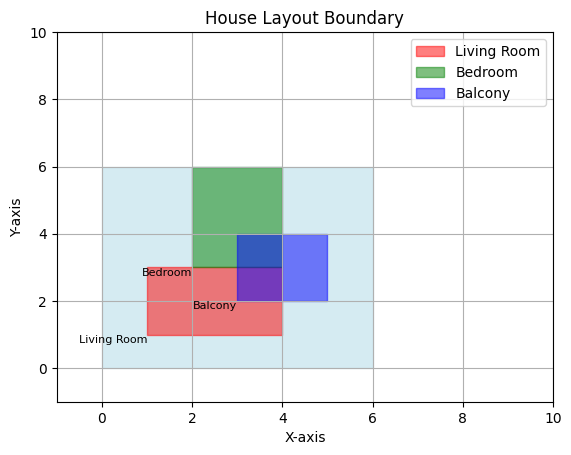

In [18]:
from shapely.geometry import Point

def adjust_shapes_to_fit_boundary(shapes, boundary_polygon_coordinates):
    boundary_polygon = Polygon(boundary_polygon_coordinates)

    for shape in shapes:
        shape_coordinates = shape['coordinates']

        # Check if it's a point
        if len(shape_coordinates) == 1:
            shape_point = Point(shape_coordinates[0])
            shape_polygon = None
        else:
            shape_polygon = Polygon(shape_coordinates)
            shape_point = None

        overlap_percentage = calculate_overlap_percentage({'coordinates': shape_coordinates}, boundary_polygon)

        if overlap_percentage < 99:
            # Adjust shape coordinates to fit within the boundary polygon
            if shape_point:
                intersection = shape_point.intersection(boundary_polygon)
            else:
                intersection = shape_polygon.intersection(boundary_polygon)

            translation_vector = (
                boundary_polygon.centroid.x - intersection.centroid.x,
                boundary_polygon.centroid.y - intersection.centroid.y
            )


            new_coordinates = [
                (x + translation_vector[0], y + translation_vector[1])
                for x, y in shape_coordinates
            ]

            shape['coordinates'] = new_coordinates

    return shapes


adjusted_shapes = adjust_shapes_to_fit_boundary(rectangles, boundary_polygon_coordinates)
print(adjusted_shapes)

plot_boundary_and_rectangles(boundary_polygon_coordinates, adjusted_shapes)

In [38]:
def perform_boundary_correction(boundary,rectangles):
    plot_boundary_and_rectangles(boundary, rectangles)

    adjusted_shapes = adjust_shapes_to_fit_boundary(rectangles, boundary)
    plot_boundary_and_rectangles(boundary, adjusted_shapes)


Kitchen: Inside, Overlap percentage: 100.00%
Bedroom 1: Inside, Overlap percentage: 100.00%
Living Room: Inside, Overlap percentage: 100.00%
Bathroom: Inside, Overlap percentage: 100.00%


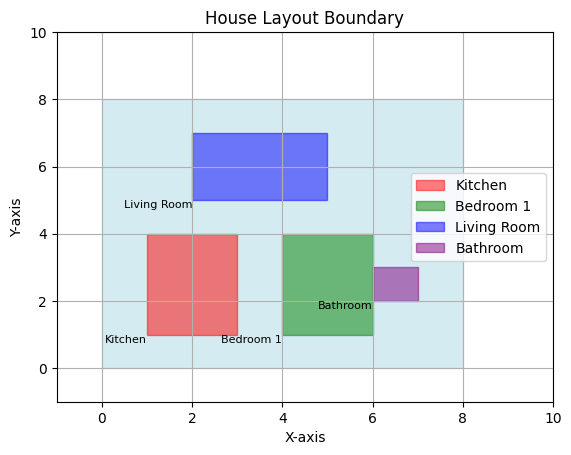

Kitchen: Inside, Overlap percentage: 100.00%
Bedroom 1: Inside, Overlap percentage: 100.00%
Living Room: Inside, Overlap percentage: 100.00%
Bathroom: Inside, Overlap percentage: 100.00%


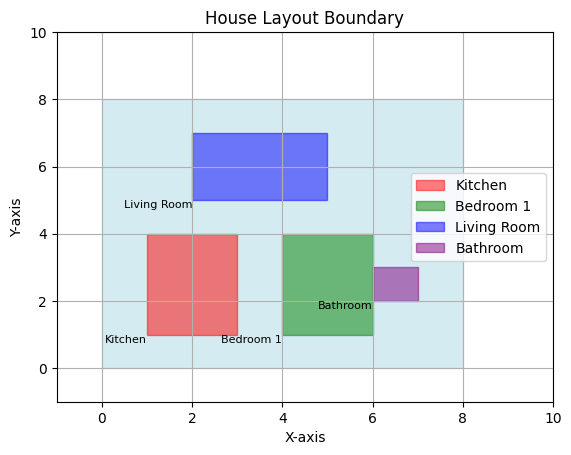

In [39]:
boundary_polygon_coordinates_2 = [(0, 0), (0, 8), (8, 8), (8, 0)]
rectangles_2 = [
    {'name': 'Kitchen', 'coordinates': [(1, 1), (1, 4), (3, 4), (3, 1)]},
    {'name': 'Bedroom 1', 'coordinates': [(4, 1), (4, 4), (6, 4), (6, 1)]},
    {'name': 'Living Room', 'coordinates': [(2, 5), (2, 7), (5, 7), (5, 5)]},
    {'name': 'Bathroom', 'coordinates': [(6, 2), (6, 3), (7, 3), (7, 2)]}
]

perform_boundary_correction(boundary_polygon_coordinates_2,rectangles_2)

Living Room: Inside, Overlap percentage: 100.00%
Bedroom 1: Inside, Overlap percentage: 100.00%
Kitchen: Outside, Overlap percentage: 50.00%
Bathroom: Inside, Overlap percentage: 100.00%


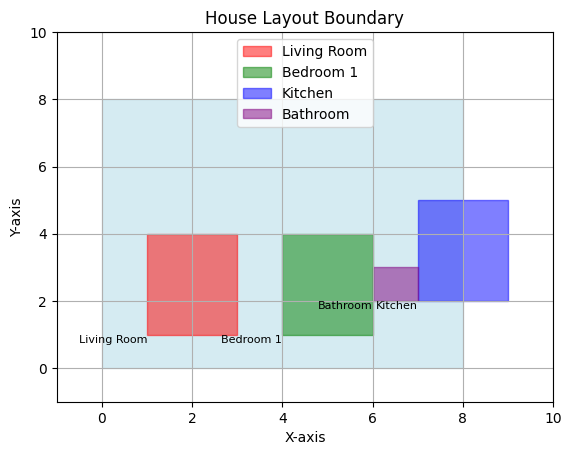

Living Room: Inside, Overlap percentage: 100.00%
Bedroom 1: Inside, Overlap percentage: 100.00%
Kitchen: Inside, Overlap percentage: 100.00%
Bathroom: Inside, Overlap percentage: 100.00%


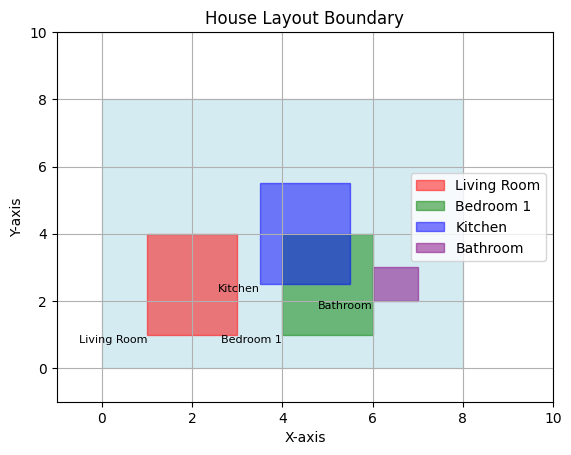

In [40]:
boundary_polygon_coordinates_2 = [(0, 0), (0, 8), (8, 8), (8, 0)]
rectangles_2 = [
    {'name': 'Living Room', 'coordinates': [(1, 1), (1, 4), (3, 4), (3, 1)]},
    {'name': 'Bedroom 1', 'coordinates': [(4, 1), (4, 4), (6, 4), (6, 1)]},
    {'name': 'Kitchen', 'coordinates': [(7, 2), (7, 5), (9, 5), (9, 2)]},  # Outside the boundary
    {'name': 'Bathroom', 'coordinates': [(6, 2), (6, 3), (7, 3), (7, 2)]}
]

perform_boundary_correction(boundary_polygon_coordinates_2,rectangles_2)

Living Room: Outside, Overlap percentage: 0.00%
Kitchen: Inside, Overlap percentage: 100.00%
Bedroom: Outside, Overlap percentage: 100.00%
Bathroom: Inside, Overlap percentage: 100.00%


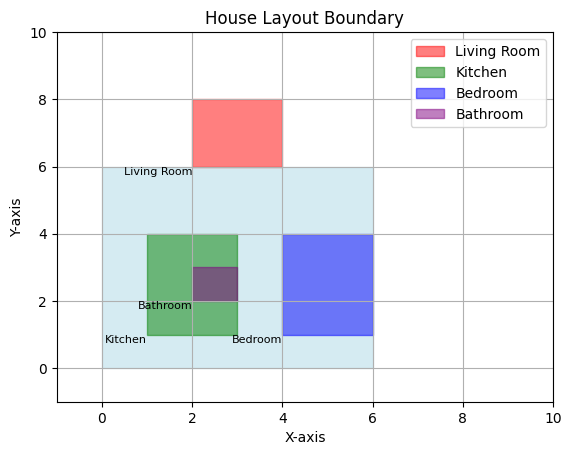

Living Room: Inside, Overlap percentage: 100.00%
Kitchen: Inside, Overlap percentage: 100.00%
Bedroom: Outside, Overlap percentage: 100.00%
Bathroom: Inside, Overlap percentage: 100.00%


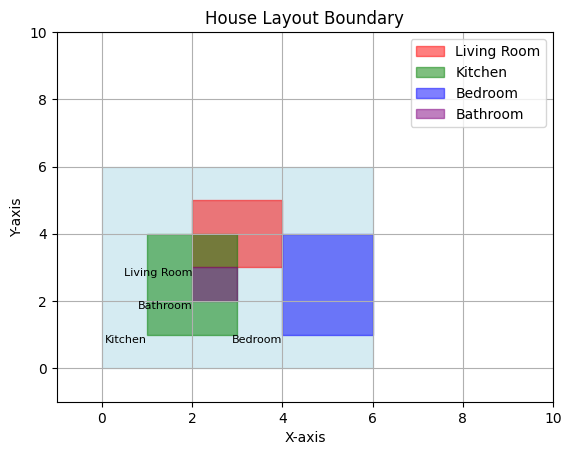

In [46]:
boundary_polygon_coordinates = [(0, 0), (0, 6), (6, 6), (6, 0)]
rectangles = [
    {'name': 'Living Room', 'coordinates': [(2,6),(2,8),(4,8),(4,6)]},  
    {'name': 'Kitchen', 'coordinates': [(1, 1), (1, 4), (3, 4), (3, 1)]},
    {'name': 'Bedroom', 'coordinates': [(4, 1), (4, 4), (6, 4), (6, 1)]},
    {'name': 'Bathroom', 'coordinates': [(2, 2), (2, 3), (3, 3), (3, 2)]}
]

perform_boundary_correction(boundary_polygon_coordinates,rectangles)

In [49]:
from shapely.geometry import Point, Polygon

def adjust_shapes_to_fit_boundary(shapes, boundary_polygon_coordinates):
    boundary_polygon = Polygon(boundary_polygon_coordinates)

    for shape in shapes:
        shape_coordinates = shape['coordinates']

        # Check if it's a point
        if len(shape_coordinates) == 1:
            shape_object = Point(shape_coordinates[0])
        else:
            shape_object = Polygon(shape_coordinates)

        # Check if the entire shape is within the boundary
        if not shape_object.within(boundary_polygon):
            # Calculate intersection between the shape and the boundary
            intersection = shape_object.intersection(boundary_polygon)

            # Calculate translation vector based on the centroid of the shape
            translation_vector = (
                boundary_polygon.centroid.x - intersection.centroid.x,
                boundary_polygon.centroid.y - intersection.centroid.y
            )

            # Adjust coordinates based on the intersection
            new_coordinates = [
                (x + translation_vector[0], y + translation_vector[1])
                for x, y in shape_coordinates
            ]

            shape['coordinates'] = new_coordinates

    return shapes


Living Room: Outside, Overlap percentage: 0.00%
Kitchen: Inside, Overlap percentage: 100.00%
Bedroom: Outside, Overlap percentage: 0.00%
Bathroom: Inside, Overlap percentage: 100.00%


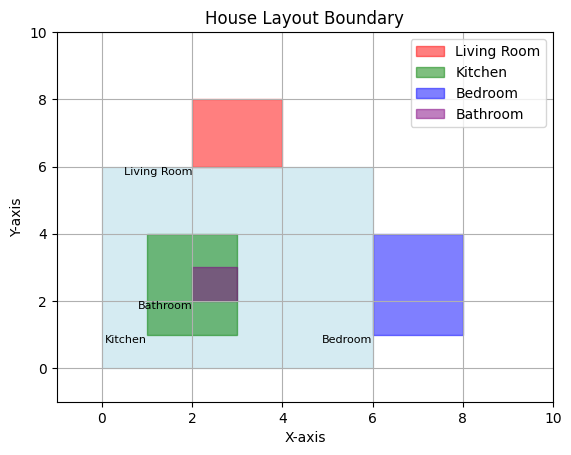

Living Room: Inside, Overlap percentage: 100.00%
Kitchen: Inside, Overlap percentage: 100.00%
Bedroom: Inside, Overlap percentage: 100.00%
Bathroom: Inside, Overlap percentage: 100.00%


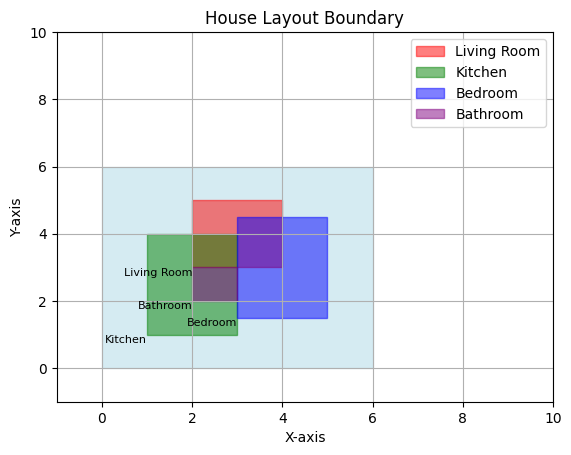

In [51]:
boundary_polygon_coordinates = [(0, 0), (0, 6), (6, 6), (6, 0)]
rectangles = [
    {'name': 'Living Room', 'coordinates': [(2,6),(2,8),(4,8),(4,6)]},  # Outside the boundary
    {'name': 'Kitchen', 'coordinates': [(1, 1), (1, 4), (3, 4), (3, 1)]},
    {'name': 'Bedroom', 'coordinates': [(6, 1), (6, 4), (8, 4), (8, 1)]},
    {'name': 'Bathroom', 'coordinates': [(2, 2), (2, 3), (3, 3), (3, 2)]}
]

perform_boundary_correction(boundary_polygon_coordinates,rectangles)